# By Hand

f1 = (x-5)**2 + 1

f2 = 2*x**2 + 3 

f3 = (x-2)** 2 - 1


$x^*=7/4$

In [2]:
alpha = 3
beta = 0.2
a = 1

x_opt = 7/4

### Iteration #1

In [3]:
z1 = 0
z2 = 0
z3 = 0

x1 = 3
x2 = 0
x3 = 1

print(f"x1 =  {x1}, \nx2 =  {x2}, \nx3 =  {x3}, \n\nz1 =  {z1}, \nz2 =  {z2}, \nz3 =  {z3}" )

x1 =  3, 
x2 =  0, 
x3 =  1, 

z1 =  0, 
z2 =  0, 
z3 =  0


### Iteration #2

In [4]:
# z1 = z1 + beta * (x1 - x2 + x1 - x3)
# z2 = z2 + beta * (x2 - x1 + x2 - x3)
# z3 = z3 + beta * (x3 - x1 + x3 - x2)

# x1 = x1 + beta*(-3-2) + beta * (-0.8-1-0.4-1) - beta * alpha * (-4)
# x2 = x2 + beta * (3+1+1+0.8-0.4+0.8+3*0)
# x3 = x3 + 1 + beta * (2-1+1+0.4-0.8+0.4-3*(-2))

# print(f"x1 =  {x1}, \nx2 =  {x2}, \nx3 =  {x3}, \n\nz1 =  {z1}, \nz2 =  {z2}, \nz3 =  {z3}" )

In [5]:
z1 = z1 + beta * (x1 - x2 + x1 - x3)
z2 = z2 + beta * (x2 - x1 + x2 - x3)
z3 = z3 + beta * (x3 - x1 + x3 - x2)

x1 = x1 + beta * (x2 - x1 + x3 - x1 + z2 - z1 + z3 - z1 - alpha * (2* x1 - 10))
x2 = x2 + beta * (x1 - x2 + x3 - x2 + z1 - z2 + z3 - z2 - alpha * (4* x2))
x3 = x3 + beta * (x1 - x3 + x2 - x3 + z1 - z3 + z2 - z3 - alpha * (2* x3 -4))

print(f"x1 =  {x1}, \nx2 =  {x2}, \nx3 =  {x3}, \n\nz1 =  {z1}, \nz2 =  {z2}, \nz3 =  {z3}" )

x1 =  3.8, 
x2 =  1.44, 
x3 =  2.968, 

z1 =  1.0, 
z2 =  -0.8, 
z3 =  -0.2


### Iteration #3

In [6]:
z1 = z1 + beta * (x1 - x2 + x1 - x3)
z2 = z2 + beta * (x2 - x1 + x2 - x3)
z3 = z3 + beta * (x3 - x1 + x3 - x2)

x1 = x1 + beta * (x2 - x1 + x3 - x1 + z2 - z1 + z3 - z1 - alpha * (2* x1 - 10))
x2 = x2 + beta * (x1 - x2 + x3 - x2 + z1 - z2 + z3 - z2 - alpha * (4* x2))
x3 = x3 + beta * (x1 - x3 + x2 - x3 + z1 - z3 + z2 - z3 - alpha * (2* x3 -4))

print(f"x1 =  {x1}, \nx2 =  {x2}, \nx3 =  {x3}, \n\nz1 =  {z1}, \nz2 =  {z2}, \nz3 =  {z3}" )

x1 =  3.61856, 
x2 =  -0.3281280000000002, 
x3 =  1.3137664, 

z1 =  1.6384, 
z2 =  -1.5776000000000001, 
z3 =  -0.060799999999999965


# Computer

### Helper functions - Euler gradient

In [7]:
def f_global(x, fs_private):    # global objective function
    """    
    Returns
    -------
    output: float
        The output of our global objective function for the current state of the agents.
            The goal is to make this output as low as possible (see eq. 1).
    
    """


    private_outputs = [ f_i(x_i) for f_i, x_i in zip(fs_private, x) ]

    # print("Private Outputs:",  private_outputs)

    global_output = sum(private_outputs)

    return global_output


def get_subgradient(f, x, delta= 1e-2):

    """
    Parameters
    -----------
    f: function
        An arbitrary function.
    x: array-like
        An array with the (multi-dimensional) point for which the subgradient of f is desired.
    delta: float
        Represents an infinitesimally small step along an axis.
    
    Returns
    -------
    float: value of the subgradient (directional derivative) of f at point x.             
    """
    
    import numpy as np

    if type(x[0]) is not float:
        x = [float(x_i) for x_i in x]

    # Depricated------------------ -> try putting a "-" in front of g at step 2 of the optimization process

    Df = np.zeros((len(x), 1), dtype=int)    # list with the partial deriatives of f w.r.t. x_1, ..., x_n

    for i in range(len(x)):

        x_aux = np.copy(x)
        
        x_aux[i] = x[i] + delta

        Df[i] = (f(x_aux)-f(x)) / delta          # Get this to work, then get back!
    
    return Df


def step(x, z, fs_private, beta= 0.2, alpha= 3, a= 1):
    """
    Changes the states of our agents based on a step in the optimization process.

    
    Returns
    --------
    x, z: tupple
        The updated angents's states (x) and updawted auxiliary states (z). 

    """

    n_agents = len(fs_private)

    #------------- first stage -----------------------
    
    # nodes exchanges states x_i and compute auxiliary states z_i.

    for i in range(n_agents):
        
        # Test the following in simple env
        z[i] = z[i] + beta*sum( [ a*(x[i] - x[j]) for j in range(n_agents) if j!= i ]  )

    
    #------------- second stage --------------------  
    
    # nodes exchange auxiliary states z_i and update states x_i.
    
    for i in range(len(fs_private)):
        
        # Test the following in simple env
        x[i] = x[i] + beta*sum( [ a*(x[j] - x[i]) for j in range(n_agents) if j!= i ]  ) \
                                + beta*sum( [ a*(z[j] - z[i]) for j in range(n_agents) if j!= i ] ) \
                                    - beta * alpha * get_subgradient(fs_private[i], x[i] )
        
    return x, z



In [8]:
import numpy as np

x1 = np.array(         # picking arbitrary initial parameters for the agents's states (2 parameters for a quadratic function) 
            [ [3.] ]
            )

x2 = np.array(        
            [ [0.] ]
            )

x3 = np.array(        
            [ [1.] ]
            )


z1 = np.array(         # picking arbitrary initial parameters for the agents's states (2 parameters for a quadratic function) 
            [ [0.] ]
            )

z2 = np.array(        
            [ [0.] ]
            )

z3 = np.array(        
            [ [0.] ]
            )


x= [x1, x2, x3]
z = [z1, z2, z3]



f1 = lambda x: np.squeeze((x[0]-5)**2 + 1)

f2 = lambda x: np.squeeze(2*x[0]**2 + 3) 

f3 = lambda x: np.squeeze((x[0]-2)** 2 - 1)


fs_private = [f1, f2, f3]



In [9]:

history_f_global = []

history_agent1 = []
history_agent2 = []
history_agent3 = []


print("Eurler gradient \n\n")

for _ in range(3):

    history_agent1.append(x[0])
    history_agent2.append(x[1])
    history_agent3.append(x[2])

    print(f"x1 =  {x[0]}, \nx2 =  {x[1]}, \nx3 =  {x[2]}, \n\nz1 =  {z[0]}, \nz2 =  {z[1]}, \nz3 =  {z[2]} \n\n\n" )

    history_f_global.append(f_global(x, fs_private))

    x, z = step(x, z, fs_private, alpha=3, beta= 0.2, a= 1)



Eurler gradient 


x1 =  [[3.]], 
x2 =  [[0.]], 
x3 =  [[1.]], 

z1 =  [[0.]], 
z2 =  [[0.]], 
z3 =  [[0.]] 



x1 =  [[3.2]], 
x2 =  [[1.32]], 
x3 =  [[2.224]], 

z1 =  [[1.]], 
z2 =  [[-0.8]], 
z3 =  [[-0.2]] 



x1 =  [[3.48608]], 
x2 =  [[-0.251904]], 
x3 =  [[2.1098752]], 

z1 =  [[1.5712]], 
z2 =  [[-1.3568]], 
z3 =  [[-0.2144]] 





/tmp/ipykernel_6426/1618579653.py:41: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x = [float(x_i) for x_i in x]


## Doesn't work,
For subgradient, replace Euler method with analytical gradient 

### Helper functions - Analytical gradient

In [10]:
def step_v2(x, z, fs_private, beta= 0.2, alpha= 3, a= 1):
    """
    Changes the states of our agents based on a step in the optimization process.

    
    Returns
    --------
    x, z: tupple
        The updated angents's states (x) and updawted auxiliary states (z). 

    """


    subgradients = [ lambda x: 2*x-10, lambda x: 4*x, lambda x: 2*x-4]


    n_agents = len(fs_private)

    #------------- first stage -----------------------
    
    # nodes exchanges states x_i and compute auxiliary states z_i.

    for i in range(n_agents):
        
        # Test the following in simple env
        z[i] = z[i] + beta*sum( [ a*(x[i] - x[j]) for j in range(n_agents) if j!= i ]  )

    
    #------------- second stage --------------------  
    
    # nodes exchange auxiliary states z_i and update states x_i.
    
    for i in range(len(fs_private)):
        
        # Test the following in simple env
        x[i] = x[i] + beta*sum( [ a*(x[j] - x[i]) for j in range(n_agents) if j!= i ]  ) \
                                + beta*sum( [ a*(z[j] - z[i]) for j in range(n_agents) if j!= i ] ) \
                                    - beta * alpha * subgradients[i](x[i])
        
    return x, z


In [11]:
import numpy as np

x1 = np.array(         # picking arbitrary initial parameters for the agents's states (2 parameters for a quadratic function) 
            [ [3.] ]
            )

x2 = np.array(        
            [ [0.] ]
            )

x3 = np.array(        
            [ [1.] ]
            )


z1 = np.array(         # picking arbitrary initial parameters for the agents's states (2 parameters for a quadratic function) 
            [ [0.] ]
            )

z2 = np.array(        
            [ [0.] ]
            )

z3 = np.array(        
            [ [0.] ]
            )


x= [x1, x2, x3]
z = [z1, z2, z3]



f1 = lambda x: np.squeeze((x[0]-5)**2 + 1)

f2 = lambda x: np.squeeze(2*x[0]**2 + 3) 

f3 = lambda x: np.squeeze((x[0]-2)** 2 - 1)


fs_private = [f1, f2, f3]




history_f_global = []

history_agent1 = []
history_agent2 = []
history_agent3 = []

print("Analytical gradient \n \n")


for _ in range(3):

    history_agent1.append(x[0])
    history_agent2.append(x[1])
    history_agent3.append(x[2])

    print(f"x1 =  {x[0]}, \nx2 =  {x[1]}, \nx3 =  {x[2]}, \n\nz1 =  {z[0]}, \nz2 =  {z[1]}, \nz3 =  {z[2]} \n\n\n" )

    history_f_global.append(f_global(x, fs_private))

    x, z = step_v2(x, z, fs_private, alpha=3, beta= 0.2, a= 1)



Analytical gradient 
 

x1 =  [[3.]], 
x2 =  [[0.]], 
x3 =  [[1.]], 

z1 =  [[0.]], 
z2 =  [[0.]], 
z3 =  [[0.]] 



x1 =  [[3.8]], 
x2 =  [[1.44]], 
x3 =  [[2.968]], 

z1 =  [[1.]], 
z2 =  [[-0.8]], 
z3 =  [[-0.2]] 



x1 =  [[3.61856]], 
x2 =  [[-0.328128]], 
x3 =  [[1.3137664]], 

z1 =  [[1.6384]], 
z2 =  [[-1.5776]], 
z3 =  [[-0.0608]] 





## step_v2() is like by-hand, replace step() with it

### compare convergence with **analytical** and **Euler** gradient

In [12]:
alpha = 3
beta = 0.2
a = 1

x_opt = 7/4

agent 1 converged on [39.48676147]
agent 2 converged on [-118.61783543]
agent 3 converged on [-20.38158971]
history agent 1:  [array([[3.]]), array([[3.8]]), array([[3.61856]]), array([[2.29277389]]), array([[4.16526074]]), array([[0.52154741]]), array([[6.2117272]]), array([[-4.00705484]]), array([[13.77255783]]), array([[-18.40626739]])]


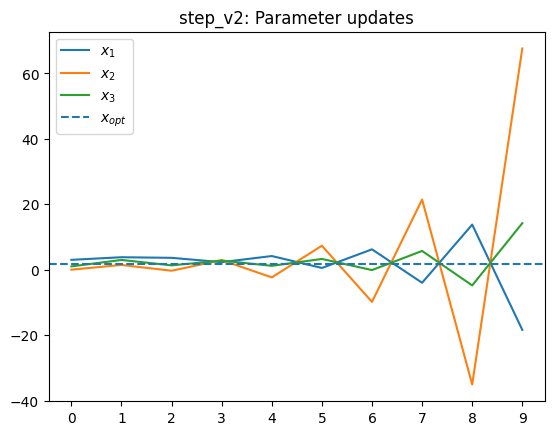

In [16]:
from matplotlib import pyplot as plt


x1 = np.array(         # picking arbitrary initial parameters for the agents's states (2 parameters for a quadratic function) 
            [ [3.] ]
            )

x2 = np.array(        
            [ [0.] ]
            )

x3 = np.array(        
            [ [1.] ]
            )


z1 = np.array(         # picking arbitrary initial parameters for the agents's states (2 parameters for a quadratic function) 
            [ [0.] ]
            )

z2 = np.array(        
            [ [0.] ]
            )

z3 = np.array(        
            [ [0.] ]
            )


x = [x1, x2, x3]
z = [z1, z2, z3]



f1 = lambda x: np.squeeze((x[0]-5)**2 + 1)

f2 = lambda x: np.squeeze(2*x[0]**2 + 3) 

f3 = lambda x: np.squeeze((x[0]-2)** 2 - 1)

fs_private = [f1, f2, f3]


history_agent1 = []
history_agent2 = []
history_agent3 = []



n_iterations = 10


for _ in range(n_iterations):

    history_agent1.append(x[0])
    history_agent2.append(x[1])
    history_agent3.append(x[2])

    x, z = step_v2(x, z, fs_private, alpha= alpha, beta= beta)


print(f"agent 1 converged on {x[0][-1]}")
print(f"agent 2 converged on {x[1][-1]}")
print(f"agent 3 converged on {x[2][-1]}")


plt.title("step_v2: Parameter updates")



print("history agent 1: ", history_agent1)

plt.plot(range(len(history_agent1)), np.squeeze(history_agent1), label= "$x_1$" )
plt.plot(range(len(history_agent2)), np.squeeze(history_agent2), label= "$x_2$" )
plt.plot(range(len(history_agent3)), np.squeeze(history_agent3), label= "$x_3$" )

plt.axhline(y= x_opt, linestyle='dashed', label= "$x_{opt}$")

plt.xticks(range(len(history_agent1)))
plt.legend()

plt.show()


# plt.title("Memory updates")




agent 1 converged on [26.62886399]
agent 2 converged on [-80.13872879]
agent 3 converged on [-12.66633536]
history agent 1:  [array([[3.]]), array([[3.2]]), array([[3.48608]]), array([[2.70681958]]), array([[3.30525092]]), array([[1.52059173]]), array([[4.25910067]]), array([[-1.3464013]]), array([[9.21262587]]), array([[-10.50936635]])]


/tmp/ipykernel_6426/1618579653.py:41: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x = [float(x_i) for x_i in x]


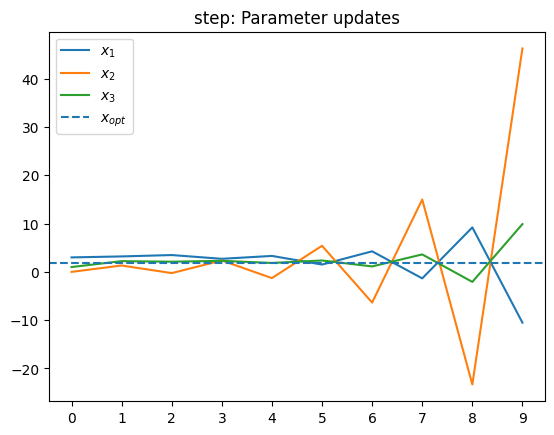

In [15]:
from matplotlib import pyplot as plt


x1 = np.array(         # picking arbitrary initial parameters for the agents's states (2 parameters for a quadratic function) 
            [ [3.] ]
            )

x2 = np.array(        
            [ [0.] ]
            )

x3 = np.array(        
            [ [1.] ]
            )


z1 = np.array(         # picking arbitrary initial parameters for the agents's states (2 parameters for a quadratic function) 
            [ [0.] ]
            )

z2 = np.array(        
            [ [0.] ]
            )

z3 = np.array(        
            [ [0.] ]
            )


x = [x1, x2, x3]
z = [z1, z2, z3]



f1 = lambda x: np.squeeze((x[0]-5)**2 + 1)

f2 = lambda x: np.squeeze(2*x[0]**2 + 3) 

f3 = lambda x: np.squeeze((x[0]-2)** 2 - 1)

fs_private = [f1, f2, f3]


history_agent1 = []
history_agent2 = []
history_agent3 = []



n_iterations = 10


for _ in range(n_iterations):

    history_agent1.append(x[0])
    history_agent2.append(x[1])
    history_agent3.append(x[2])

    x, z = step(x, z, fs_private, alpha= alpha, beta= beta)


print(f"agent 1 converged on {x[0][-1]}")
print(f"agent 2 converged on {x[1][-1]}")
print(f"agent 3 converged on {x[2][-1]}")


plt.title("step: Parameter updates")



print("history agent 1: ", history_agent1)

plt.plot(range(len(history_agent1)), np.squeeze(history_agent1), label= "$x_1$" )
plt.plot(range(len(history_agent2)), np.squeeze(history_agent2), label= "$x_2$" )
plt.plot(range(len(history_agent3)), np.squeeze(history_agent3), label= "$x_3$" )

plt.axhline(y= x_opt, linestyle='dashed', label= "$x_{opt}$")

plt.xticks(range(len(history_agent1)))
plt.legend()

plt.show()


# plt.title("Memory updates")




In [14]:
print(len(history_agent1))

10
